공공데이타 - https://www.data.go.kr/dataset/15012005/fileData.do

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("상가정보_서울_202403.csv", dtype={2: str})

In [3]:
df.shape

(395, 10)

In [12]:
df

,Unnamed: 0,상호명,브랜드명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
0,0,비알배스킨라빈스한남HIVE,배스킨라빈스,서울특별시,용산구,한남동,한남동,서울특별시 용산구 독서당로 93,127.010579,37.535004,비알배스킨라빈스한남hive
1,1,비알배스킨라빈스동부이촌점,배스킨라빈스,서울특별시,용산구,이촌1동,이촌동,서울특별시 용산구 이촌로 260,126.976135,37.518537,비알배스킨라빈스동부이촌점
2,2,배스킨라빈스상계역점,배스킨라빈스,서울특별시,노원구,중계4동,중계동,서울특별시 노원구 한글비석로 384,127.073221,37.659802,배스킨라빈스상계역점
3,3,배스킨라빈스길동역점,배스킨라빈스,서울특별시,강동구,길동,길동,서울특별시 강동구 양재대로 1471,127.139247,37.537355,배스킨라빈스길동역점
4,4,비알배스킨라빈스서울대병원,배스킨라빈스,서울특별시,종로구,이화동,연건동,서울특별시 종로구 대학로 101,126.997184,37.580448,비알배스킨라빈스서울대병원
...,...,...,...,...,...,...,...,...,...,...,...
390,390,배스킨라빈스영등포,배스킨라빈스,서울특별시,영등포구,당산1동,당산동1가,서울특별시 영등포구 당산로 104,126.896396,37.523864,배스킨라빈스영등포
391,391,배스킨라빈스목동서로점,배스킨라빈스,서울특별시,양천구,목1동,목동,서울특별시 양천구 목동서로 250,126.869330,37.524960,배스킨라빈스목동서로점
392,392,배스킨라빈스용마산역점,배스킨라빈스,서울특별시,중랑구,면목4동,면목동,서울특별시 중랑구 면목로 243,127.085008,37.574773,배스킨라빈스용마산역점
393,393,배스킨라빈스학동역점,배스킨라빈스,서울특별시,강남구,논현1동,논현동,서울특별시 강남구 학동로 165,127.028866,37.513873,배스킨라빈스학동역점


In [4]:
df.columns

Index(['Unnamed: 0', '상호명', '브랜드명', '시도명', '시군구명', '행정동명', '법정동명', '도로명주소',
       '경도', '위도'],
      dtype='object')

In [7]:
df["시군구명"].unique()

array(['용산구', '노원구', '강동구', '종로구', '강서구', '영등포구', '은평구', '성북구', '관악구',
       '도봉구', '성동구', '서초구', '구로구', '서대문구', '동작구', '광진구', '강남구', '중구',
       '금천구', '송파구', '동대문구', '중랑구', '강북구', '마포구', '양천구'], dtype=object)

In [13]:
brand_count = df["브랜드명"].value_counts() # "브랜드명"의 빈도수
brand_count

브랜드명
배스킨라빈스    291
던킨도너츠     104
Name: count, dtype: int64

In [14]:
relative_frequency = df["브랜드명"].value_counts(normalize=True)  # normalize=True 빈도수의 비율
relative_frequency

브랜드명
배스킨라빈스    0.736709
던킨도너츠     0.263291
Name: proportion, dtype: float64

In [15]:
plt.rc('font', family='Malgun Gothic') 

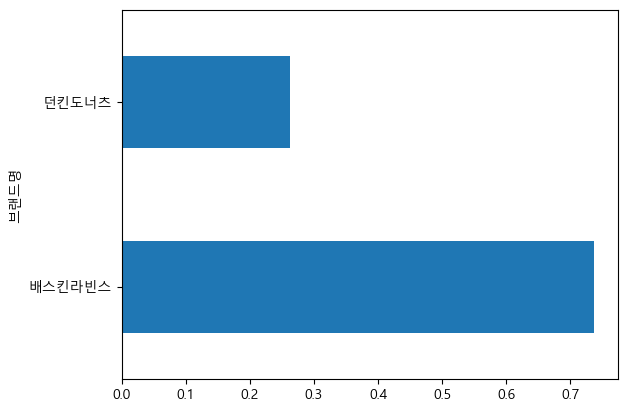

In [16]:
relative_frequency.plot.barh();

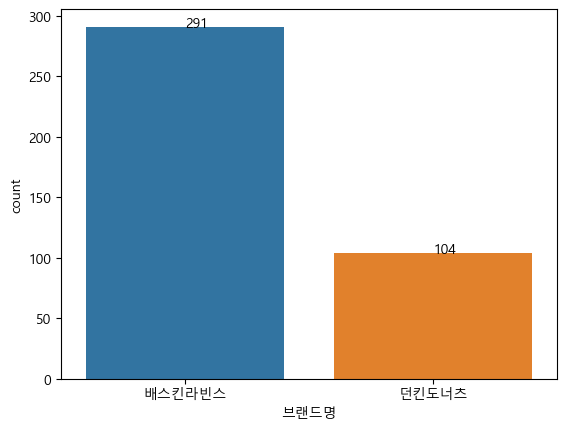

In [17]:
g = sns.countplot(data=df, x="브랜드명")

for i, val in enumerate(brand_count):
    g.text(x=i, y=val, s=val)


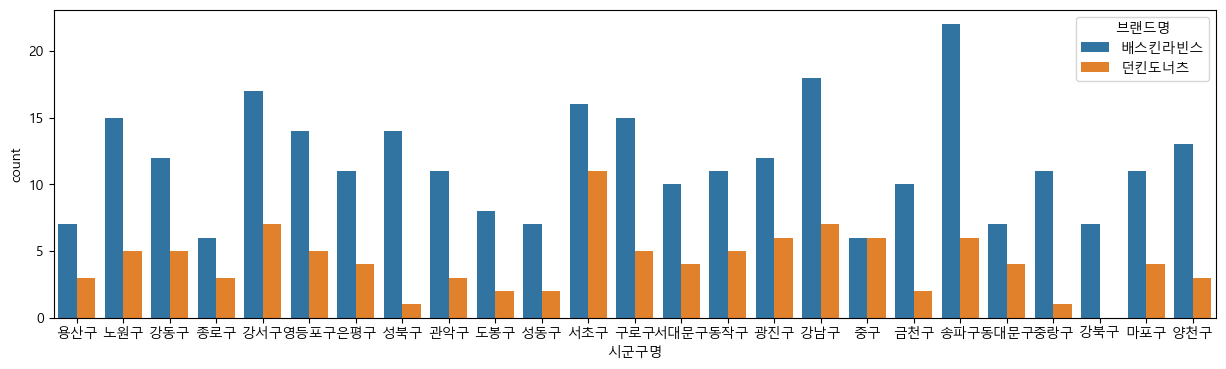

In [18]:
plt.figure(figsize=(15, 4))
g = sns.countplot(data=df, x="시군구명", hue="브랜드명")

In [19]:
table_city_brand = df.pivot_table(index="시군구명", columns="브랜드명", values="상호명", aggfunc="count")
table_city_brand.head()

브랜드명,던킨도너츠,배스킨라빈스
시군구명,,
강남구,7.0,18.0
강동구,5.0,12.0
강북구,NaN,7.0
강서구,7.0,17.0
관악구,3.0,11.0


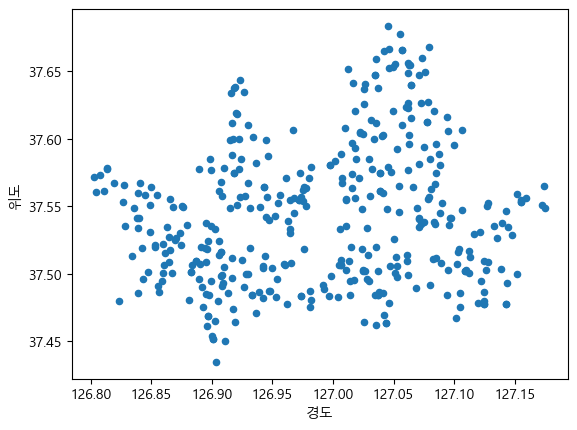

In [20]:
df[["위도", "경도"]].plot.scatter(x="경도", y="위도");   # 산점도(scatter plot)

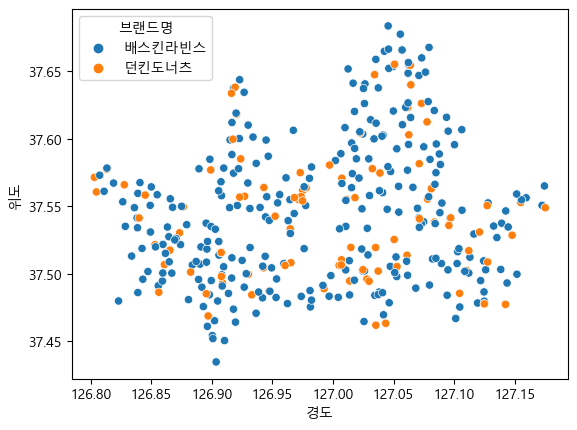

In [21]:
sns.scatterplot(data=df, x="경도", y="위도", hue="브랜드명");

https://python-visualization.github.io/folium/latest/user_guide/map.html

지도 시각화를 위한 라이브러리   
pip install folium

In [22]:
import folium

In [23]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 
lat = df["위도"].mean()
long = df["경도"].mean()
lat, long

(37.544168099384144, 126.9905536972075)

In [24]:
folium.Map(
    location=(lat, long),
    control_scale=True,
)

In [25]:
m = folium.Map([lat, long])

folium.Marker(
    [37.495593, 127.039032], 
    popup='<i>던킨도너츠</i>', 
    tooltip="던킨도너츠").add_to(m)

m

In [26]:
df_31.index

RangeIndex(start=0, stop=395, step=1)

In [27]:
m = folium.Map([lat, long], zoom_start=12)

for i in df.index:
    
    sub_lat = df.loc[i, "위도"]
    sub_long = df.loc[i, "경도"]
    title = df.loc[i, "상호명"] + " - " + df.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "red"
    
    folium.Marker(
        [sub_lat, sub_long], 
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(m)

m

In [28]:
from folium.plugins import MarkerCluster

m = folium.Map([lat, long], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)

for i in df.index:
    
    sub_lat = df.loc[i, "위도"]
    sub_long = df.loc[i, "경도"]
    title = df.loc[i, "상호명"] + " - " + df.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "red"
    
    folium.Marker(
        [sub_lat, sub_long], 
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(marker_cluster)

m.save('index.html')
m